In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import rand
import seaborn as sns


In [2]:
# Loading the data
data = pd.read_csv('yelp_academic_dataset_with_price_rating.csv')
data_cleaned = data.dropna()
data_cleaned.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,attributes,Categories,price_rating
0,19102_African_Alice,Alice Pizza,235 S 15th St,Philadelphia,PA,19102,39.948332,-75.166127,4.5,243,"""{RestaurantsTakeOut: True, GoodForMeal: \""{de...",African,2.0
1,19104_African_Renata's,Renata's Kitchen,3940 Baltimore Ave,Philadelphia,PA,19104,39.949660,-75.202667,4.0,203,"""{RestaurantsAttire: \""ucasual\"", WiFi: \""ufre...",African,2.0
2,19107_African_Bill's,Bill's Breakfast & Lunch,1312 Sansom St,Philadelphia,PA,19107,39.949848,-75.162761,4.0,132,"""{RestaurantsPriceRange2: 1, RestaurantsAttir...",African,1.0
3,19107_African_Sang,Sang Kee Peking Duck House,238 N 9th St,Philadelphia,PA,19107,39.956399,-75.154287,4.0,926,"""{Alcohol: \""ufull_bar\"", RestaurantsGoodForGr...",African,2.0
4,19123_African_Ken,Ken Shin Asian Diner,301 Spring Garden St,Philadelphia,PA,19123,39.961086,-75.143547,3.5,152,"""{HasTV: True, NoiseLevel: \""uaverage\"", Resta...",African,2.0


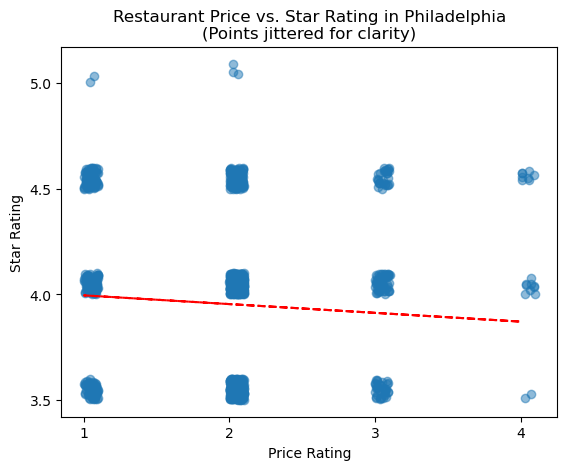

In [3]:
# Create scatter plot with jitter
plt.scatter(data_cleaned['price_rating'] + rand(len(data_cleaned)) * 0.1, 
                           data_cleaned['stars'] + rand(len(data_cleaned)) * 0.1, 
                           alpha=0.5)

# Label chart
plt.title('Restaurant Price vs. Star Rating in Philadelphia\n(Points jittered for clarity)')
plt.xlabel('Price Rating')
plt.ylabel('Star Rating')

# Create ticks
unique_prices = sorted(data_cleaned['price_rating'].unique())
plt.xticks(unique_prices)
unique_ratings = sorted(data_cleaned['stars'].unique())
plt.yticks(unique_ratings)

# Create and plot linear regression line
z = np.polyfit(data_cleaned['price_rating'], data_cleaned['stars'], 1)
plt.plot(data_cleaned['price_rating'], np.poly1d(z)(data_cleaned['price_rating']), "r--")

# Save chart as png
plt.savefig('charts/scatterplot.png')

# Display chart
plt.show()


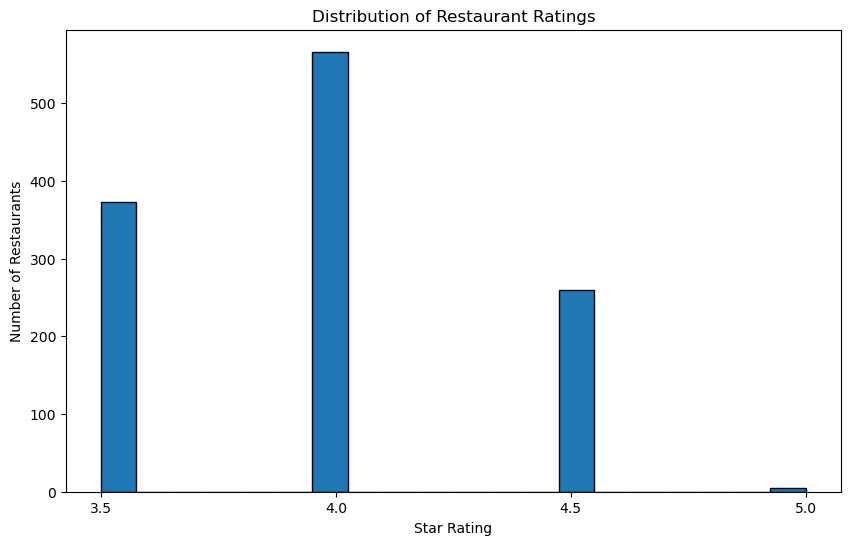

In [4]:
# Create histogram
plt.figure(figsize=(10, 6))
plt.hist(data_cleaned['stars'], bins=20, edgecolor='black')

# Label chart
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Number of Restaurants')

# Create ticks
unique_prices = sorted(data_cleaned['stars'].unique())
plt.xticks(unique_prices)

# Save chart as png
plt.savefig('charts/histogram.png')

# Display chart
plt.show()

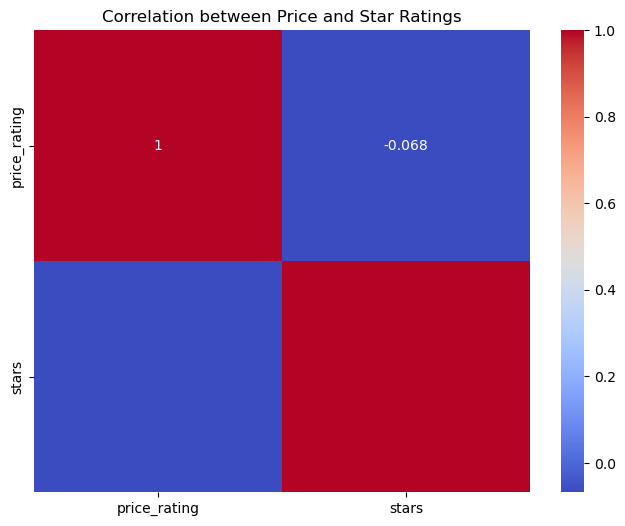

In [5]:
correlation = data_cleaned[['price_rating', 'stars']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation between Price and Star Ratings')

# Save chart as png
plt.savefig('charts/correlation.png')

# Display chart
plt.show()

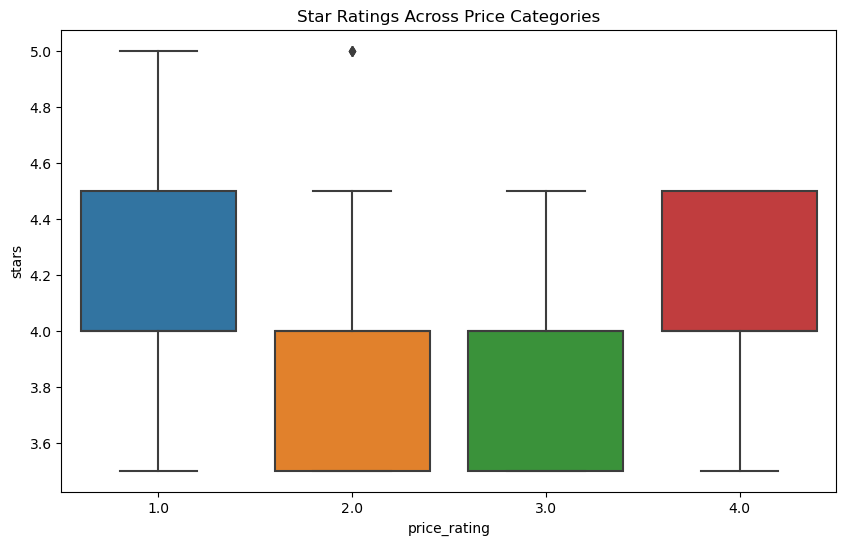

In [6]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='price_rating', y='stars', data=data_cleaned)
plt.title('Star Ratings Across Price Categories')

# Save chart as png
plt.savefig('charts/boxplot.png')

# Display chart
plt.show()

/var/folders/gl/k_pyl1y91bnbsy88pcscc2lh0000gp/T/ipykernel_26488/3250443537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['value_score'] = data_cleaned['stars'] /data_cleaned['price_rating']
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


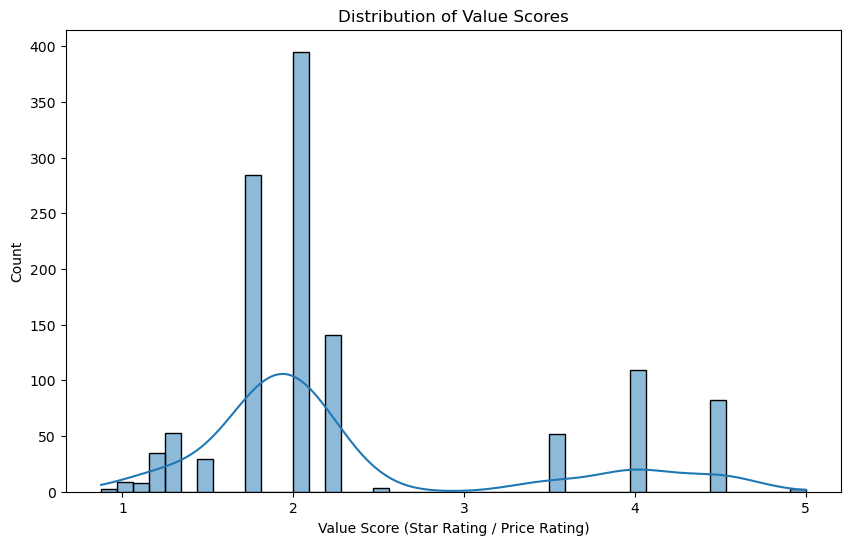

In [7]:
data_cleaned['value_score'] = data_cleaned['stars'] /data_cleaned['price_rating']
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['value_score'], kde=True)
plt.title('Distribution of Value Scores')
plt.xlabel('Value Score (Star Rating / Price Rating)')

# Save chart as png
plt.savefig('charts/value_score.png')

# Display chart
plt.show()